<a href="https://colab.research.google.com/github/NikunjRathod200/Machine-Learning/blob/main/Heat_Failure_Prediction_and_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import math
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Heart Failure Prediction

In [ ]:
heart=pd.read_csv('/content/heart.csv')

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
train, test = train_test_split(heart, test_size=0.2, random_state=2529)

In [ ]:
X_train, y_train = train.drop('target', axis=1), train['target']
X_test, y_test = test.drop('target', axis=1), test['target']

In [ ]:
ohe = OneHotEncoder()

y_train=np.array(y_train).reshape(-1,1)
y_train = ohe.fit_transform(y_train).toarray()

y_test=np.array(y_test).reshape(-1,1)
y_test = ohe.fit_transform(y_test).toarray()

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

In [ ]:
X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(X_train_scaled, y_train, test_size=0.20, random_state=40)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)

(193, 13)
(193, 2)
(49, 13)


In [ ]:
model = Sequential()
model.add(Dense(activation = "relu", input_dim = 13, 
                     units = 10, kernel_initializer = "uniform"))
model.add(Dense(activation = "relu", units = 9, 
                     kernel_initializer = "uniform"))
model.add(Dense(activation = "sigmoid", units = 2, 
                     kernel_initializer = "uniform"))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 9)                 99        
                                                                 
 dense_2 (Dense)             (None, 2)                 20        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled1 , Y_train1 , batch_size = 8 ,epochs = 200 )

Epoch 1/200
25/25 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5026
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5285
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.7098
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.8031
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.8135
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8187
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8238
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8342
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8497
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8497
Epoch 11/

In [ ]:
pred_train1= model.predict(X_train_scaled1)
scores = model.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100)) 

7/7 [==============================] - 0s 3ms/step
Accuracy on training data: 97.92746305465698% 
Error on training data: 2.0725369453430176


In [ ]:
pred_test1= model.predict(X_test_scaled)

scores1 = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))

2/2 [==============================] - 0s 7ms/step
Accuracy on test data: 75.40983557701111% 
Error on test data: 24.59016442298889


In [ ]:
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i]))

In [ ]:
test1 = list()
for i in range(len(y_test)):
    test1.append(np.argmax(y_test[i]))

In [ ]:
pd.DataFrame({'Test':test1,'Pred':pred1}).head(20)

,Test,Pred
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


# Fashion MNIST Dataset

In [2]:
batch_size = 128
num_classes = 10
epochs = 15
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

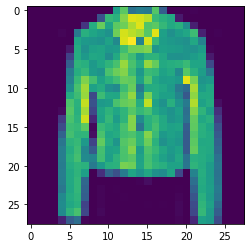

In [7]:
plt.imshow(X_test[10].reshape(28,28))

In [8]:
fashion_mnist_model = tf.keras.models.Sequential()
fashion_mnist_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[28,28,1]))
fashion_mnist_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
fashion_mnist_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
fashion_mnist_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
fashion_mnist_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
fashion_mnist_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# ANN model
fashion_mnist_model.add(tf.keras.layers.Flatten())
fashion_mnist_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
fashion_mnist_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
fashion_mnist_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
fashion_mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [9]:
fashion_mnist_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.0001))
fashion_mnist_model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 185s 97ms/step - loss: 0.6388 - accuracy: 0.7686
Epoch 2/15
1875/1875 [==============================] - 163s 87ms/step - loss: 0.4058 - accuracy: 0.8544
Epoch 3/15
1875/1875 [==============================] - 162s 87ms/step - loss: 0.3492 - accuracy: 0.8754
Epoch 4/15
1875/1875 [==============================] - 162s 87ms/step - loss: 0.3132 - accuracy: 0.8873
Epoch 5/15
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2884 - accuracy: 0.8946
Epoch 6/15
1875/1875 [==============================] - 164s 87ms/step - loss: 0.2674 - accuracy: 0.9029
Epoch 7/15
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2511 - accuracy: 0.9083
Epoch 8/15
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2401 - accuracy: 0.9128
Epoch 9/15
1875/1875 [==============================] - 162s 87ms/step - loss: 0.2262 - accuracy: 0.9180
Epoch 10/15
1875/1875 [==============================] 

In [10]:
test_loss, test_accuracy = fashion_mnist_model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.2076 - accuracy: 0.9258


In [11]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9258000254631042
